In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os 

/Users/dannymorton/Desktop/data_m2/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



| Functions | Description | Arguments | Returns |
| --- | --- | --- | --- | 
| load_or_fetch_data(csv_file_path: str, api_url: str) -> pd.DataFrame | Loads data from a CSV file if it exists. If the file does not exist, it fetches data from the provided API URL and saves it to the CSV file. | csv_file_path (str): The path to the CSV file. | api_url (str): The base URL of the API to fetch data from. | A Pandas DataFrame containing the loaded or fetched data. | 
| rnm_cleaning(rnm: pd.DataFrame) -> pd.DataFrame | Cleans the Rick and Morty DataFrame by dropping unnecessary columns, converting the created column to datetime format, and adding an is_human column. | rnm (pd.DataFrame): The input DataFrame. | The cleaned DataFrame. |
| plot_species_and_human_distribution(cleaned_rnm: pd.DataFrame) -> None | Plots two pie charts: one showing the species distribution and another showing the human vs non-human distribution. | cleaned_rnm (pd.DataFrame): The cleaned DataFrame with the species and is_human columns. | None. | 
| plot_species_breakdown(cleaned_rnm: pd.DataFrame) -> None | Plots a bar chart showing the breakdown of species, highlighting the most popular species. | cleaned_rnm (pd.DataFrame): The cleaned DataFrame with the species column. | None.| 

In [ ]:
def load_or_fetch_data(csv_file_path: str, api_url: str) -> pd.DataFrame:
    """
    Load data from a CSV file if it exists. If the file does not exist, 
    fetch data from an API, save it to the CSV file, and return it as a DataFrame.

    Args:
        csv_file_path (str): The path to the CSV file.
        api_url (str): The base URL of the API to fetch data from.

    Returns:
        pd.DataFrame: The data loaded from the CSV or fetched from the API.
    """
    if os.path.exists(csv_file_path):
        print(f"CSV file '{csv_file_path}' found. Loading data from CSV.")
        return pd.read_csv(csv_file_path)
    else:
        print(f"CSV file '{csv_file_path}' not found. Fetching data from API.")

        results = []
        page = 1

        while True:
            response = requests.get(f'{api_url}?page={page}')
            data = response.json()

            if 'results' in data and len(data['results']) > 0:
                results.extend(data['results'])
                page += 1
            else:
                break

        if not os.path.exists(os.path.dirname(csv_file_path)):
            os.makedirs(os.path.dirname(csv_file_path))

        df = pd.DataFrame(results)
        df.to_csv(csv_file_path, index=False)
        print(f"Data fetched and saved to '{csv_file_path}'.")
        return df


def rnm_cleaning(rnm: pd.DataFrame) -> pd.DataFrame:
    """
    Cleans the 'rnm' DataFrame by:
    1. Dropping unnecessary columns: 'type', 'origin', 'location', 'image', 'episode', and 'url'.
    2. Converting the 'created' column to a datetime format.
    3. Adding a new boolean column 'is_human' based on the 'species' column.
    
    Args:
        rnm (pd.DataFrame): The input DataFrame to be cleaned.
    
    Returns:
        pd.DataFrame: The cleaned DataFrame with dropped columns, converted 'created' column,
                      and the added 'is_human' column.
    """
    cols_to_drop = ['type', 'origin', 'location', 'image', 'episode', 'url']
    rnm = rnm.drop(columns=cols_to_drop)

    rnm['created'] = pd.to_datetime(rnm['created']).dt.date
    rnm['created'] = pd.to_datetime(rnm['created'])

    rnm['is_human'] = rnm['species'] == 'Human'
    return rnm


def plot_species_and_human_distribution(cleaned_rnm: pd.DataFrame) -> None:
    """
    Plots the distribution of species and human vs non-human data.

    This function creates a set of two pie charts:
    1. The first chart shows the distribution of species in the dataset.
    2. The second chart shows the distribution of 'is_human' values, 
       labeling them as 'Human' and 'Non-Human'.

    Args:
        cleaned_rnm (pd.DataFrame): A DataFrame containing the 'species' and 'is_human' columns.

    Returns:
        None: The function generates and displays two pie charts.
    """
    # Count the values in 'species' and 'is_human'
    species_counts = cleaned_rnm['species'].value_counts()
    is_human_counts = cleaned_rnm['is_human'].value_counts()

    # Define the subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for 'species' 
    axes[0].pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=210,
                labeldistance=1.2)  
    axes[0].set_title('Species Distribution')

    # Plot for 'is_human'
    axes[1].pie(is_human_counts, labels=is_human_counts.index.map({True: 'Human', False: 'Non-Human'}),
                autopct='%1.1f%%', startangle=90, labeldistance=1.1)  
    axes[1].set_title('Human vs Non-Human')

    plt.tight_layout()
    plt.show()


def plot_species_breakdown(cleaned_rnm: pd.DataFrame) -> None:
    """
    Plots a bar chart showing the breakdown of species in the dataset.

    This function generates a bar chart of the species counts, highlighting the
    most popular species with a distinct color (green), while other species are
    shown in gray. It also adds data labels to the bars for better clarity.

    Args:
        cleaned_rnm (pd.DataFrame): A DataFrame containing the 'species' column.

    Returns:
        None: The function generates and displays a bar chart.
    """
    # Count the values in 'species'
    species_counts = cleaned_rnm['species'].value_counts()

    # Colors to highlight the most popular species
    colors = ['#00FF00' if i == 0 else '#808080' for i in range(len(species_counts))]  # Green for most common species

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = species_counts.plot.bar(color=colors, ax=ax, width=0.8)

    # Add data labels
    ax.bar_label(ax.containers[0])

    # Title and labels
    plt.title('Species Breakdown from Rick and Morty', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


CSV file 'data/rick_n_morty.csv' not found. Fetching data from API.
Data fetched and saved to 'data/rick_n_morty.csv'.


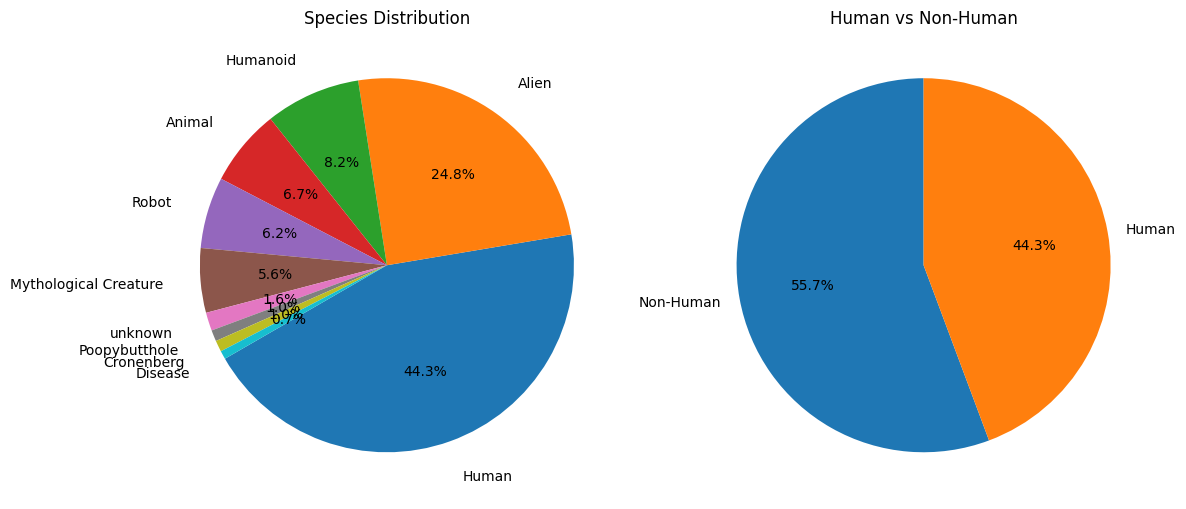

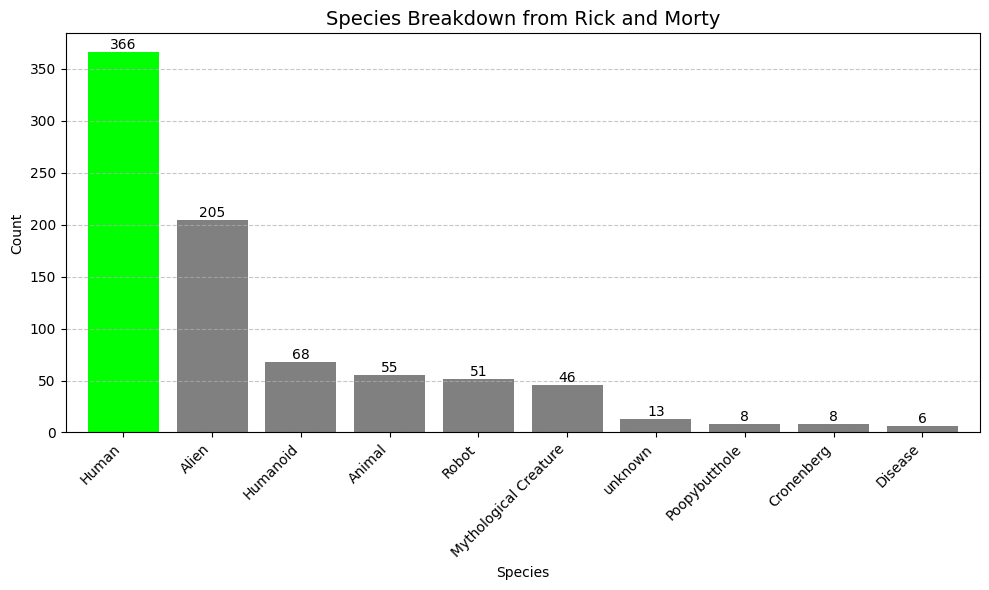

In [3]:
def main() -> None:
    """
    Main function to load, clean, and plot data related to Rick and Morty species and human distribution.

    This function loads the data from either a local CSV or an API endpoint, cleans the data, and 
    then plots two visualizations:
    1. A pie chart of species distribution and human vs non-human distribution.
    2. A bar chart showing species breakdown with the most popular species highlighted.
    """
    # File path and API endpoint
    csv_path = "data/rick_n_morty.csv"
    api_endpoint = "https://rickandmortyapi.com/api/character"
    
    # Load or fetch the data (assumes a function exists to either read from a CSV or fetch from an API)
    rnm = load_or_fetch_data(csv_path, api_endpoint)
    
    # Clean the data (assumes a cleaning function to process the raw data)
    rnm_clean = rnm_cleaning(rnm)
    
    # Plot species and human distribution
    plot_species_and_human_distribution(rnm_clean)
    
    # Plot species breakdown with the most popular species highlighted
    plot_species_breakdown(rnm_clean)

# Call the main function if the script is executed
if __name__ == "__main__":
    main()

# Summary 

The data highlights a clear preference for human and alien characters in the Rick and Morty universe, with other species making up a much smaller proportion of the total. The diversity reflects the show's imaginative world-building, especially with its inclusion of robots, mythological creatures, and even niche species like Cronenberg variations.

**Humans** are the dominant species, with 366 characters, making up the majority of the sample.
Aliens come next with 205 appearances, showing significant representation in the show.

**Other notable species include:**
- Humanoids: 68
- Animals: 55
- Robots: 51
- Mythological Creatures: 46

**Species with lower counts include:**
- Unknown: 13
- Poopybutthole and Cronenberg: 8 each
- Disease: 6
